## Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize

import scipy.cluster.hierarchy as shc

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.decomposition import PCA
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn_extra.cluster import KMedoids

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import log_loss


from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as shc


import warnings
warnings.filterwarnings('ignore')

## Read Data

In [2]:
data = pd.read_csv('ML_Project_data.csv')
modelData = data.drop(['label'], axis=1)
labels = data['label']

In [3]:
data.sample(n=5)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f60,f61,f62,f63,f64,f65,f66,f67,f68,label
6146,81138,2779.923588,685146.71960,5951.597345,1.564627e+06,0.294830,0.208547,0.245310,0.251610,0.464840,...,57.440601,110.513573,60.103485,78.528786,84.995300,87.380722,107.523499,99.971283,129.099442,2
203,94039,2917.263492,414044.80950,6318.153462,1.444734e+06,0.271212,0.396588,0.378127,0.586062,0.435569,...,56.259701,44.428131,39.010170,58.661476,41.253506,44.616371,61.704552,79.885200,90.750542,0
564,75672,2609.028417,302593.37420,5945.789047,1.012715e+06,0.421116,0.461686,0.602216,0.398057,0.406572,...,58.612034,77.249092,85.723724,74.349533,65.030075,58.336891,49.040691,50.695351,54.189724,0
11438,55345,2244.985871,649943.47090,4926.661876,3.407399e+06,0.529377,0.364057,0.287654,0.439440,0.323816,...,72.611031,74.624405,71.661888,70.281593,69.160530,106.508469,114.042061,79.494209,87.617325,4
2676,46,163.418495,46087.47538,84.616155,1.453325e+05,0.791213,0.848054,0.899388,0.933084,0.948364,...,147.548325,133.093582,163.085449,116.019096,93.952003,74.799995,88.929710,95.203850,67.401894,1


## Data Normalization

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(modelData)
modelData_scaled = scaler.transform(modelData)

In [5]:
pd.concat([pd.DataFrame(modelData_scaled), labels], axis=1).sample(n=5)

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,label
11877,0.315859,0.543347,0.306547,0.714729,0.168404,0.336841,0.162642,0.200314,0.261575,0.489918,...,0.084439,0.061508,0.144983,0.119975,0.112430,0.146778,0.131347,0.115821,0.155828,4
3997,0.404154,0.439818,0.030915,0.490150,0.015033,0.401739,0.482264,0.740090,0.252240,0.337606,...,0.046539,0.033269,0.033149,0.026734,0.037719,0.048765,0.058791,0.127152,0.131781,1
7784,0.347706,0.446560,0.171610,0.494545,0.142327,0.592188,0.274516,0.380073,0.352891,0.323201,...,0.034711,0.039802,0.033147,0.068738,0.054349,0.014637,0.037476,0.062918,0.073595,3
8613,0.172212,0.261769,0.052076,0.314794,0.139347,0.257643,0.257183,0.256659,0.458941,0.257632,...,0.115839,0.074467,0.076708,0.194624,0.115836,0.172571,0.096055,0.106297,0.197220,3
4856,0.266266,0.390661,0.155258,0.456501,0.180404,0.152568,0.240876,0.280760,0.175858,0.223281,...,0.102057,0.095014,0.081554,0.065706,0.042098,0.051434,0.063514,0.088263,0.069940,2


## Features Selection

In [6]:
data.corr().sample(n=5)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f60,f61,f62,f63,f64,f65,f66,f67,f68,label
f24,-0.079965,-0.102662,0.020901,-0.104682,0.022023,-0.045142,-0.423097,-0.048702,-0.237173,-0.139887,...,-0.012718,0.041865,0.024167,0.014606,0.046286,0.124533,0.192546,0.204739,0.093662,-0.020625
f10,0.160115,0.240977,0.073583,0.260038,0.034994,0.138933,0.124164,0.115151,0.343957,0.541952,...,-0.071723,-0.123930,-0.121740,-0.150163,-0.119839,-0.113484,-0.109808,-0.064655,-0.057445,-0.102931
f66,0.015400,-0.073504,-0.016142,-0.134672,0.002597,-0.254746,-0.278379,-0.234749,-0.178180,-0.162890,...,0.434804,0.492897,0.539172,0.602161,0.678717,0.788892,1.000000,0.789241,0.629947,0.054075
f22,-0.051484,-0.046730,0.027413,-0.040638,0.028442,-0.044471,-0.247950,-0.116111,0.021941,0.032437,...,0.024255,0.001602,-0.002216,-0.022279,-0.000731,0.039312,0.076348,0.139269,0.190987,-0.025022
f5,0.078375,0.176350,0.053678,0.215538,0.012751,1.000000,0.435964,0.242284,0.145662,0.074685,...,-0.119946,-0.124454,-0.089380,-0.121339,-0.192360,-0.221510,-0.254746,-0.313339,-0.321400,-0.161283


In [7]:
display(data.corr()['label'])

f0      -0.096589
f1      -0.095564
f2       0.135957
f3      -0.118736
f4       0.146644
           ...   
f65      0.005227
f66      0.054075
f67      0.082596
f68      0.096932
label    1.000000
Name: label, Length: 70, dtype: float64

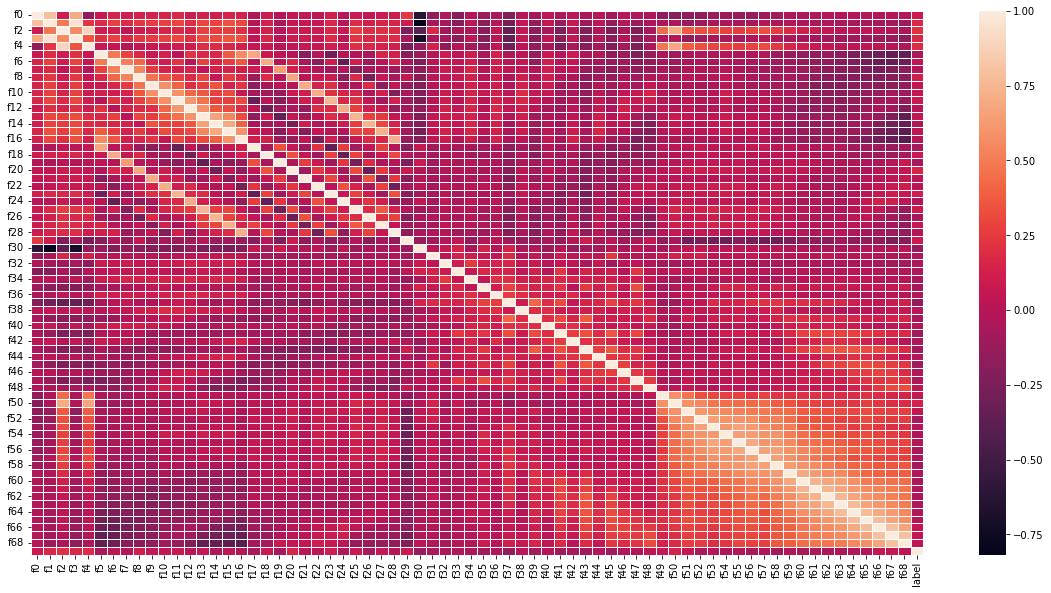

In [8]:
plt.figure(figsize = (20, 10))

data_log = data.copy()
data_log = np.log10(data_log)
data_heatmap = sns.heatmap(data_log.corr(), linewidths = 0.5)

plt.show()

In [9]:
print("Selected Features with correlation between features: \n")
data_log_corr = data_log.corr()['label'].sort_values(ascending = False)[1:51]
print(np.array(data_log_corr.index))

Selected Features with correlation between features: 

['f2' 'f4' 'f3' 'f1' 'f20' 'f50' 'f8' 'f23' 'f25' 'f0' 'f29' 'f11' 'f18'
 'f51' 'f66' 'f13' 'f49' 'f27' 'f10' 'f67' 'f9' 'f15' 'f6' 'f48' 'f68'
 'f21' 'f22' 'f53' 'f12' 'f38' 'f7' 'f65' 'f28' 'f40' 'f44' 'f36' 'f47'
 'f55' 'f16' 'f64' 'f14' 'f61' 'f33' 'f46' 'f31' 'f24' 'f59' 'f57' 'f32'
 'f54']


In [10]:
features = list(modelData.columns)
selectModel = SelectKBest(chi2, k=50)
selectModel.fit(modelData_scaled, labels)
selected_features = selectModel.get_feature_names_out(features)

In [11]:
print("Selected Features with feature selsection algorithm: \n")
display(selected_features)

Selected Features with feature selsection algorithm: 



array(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
       'f31', 'f33', 'f34', 'f37', 'f40', 'f41', 'f42', 'f44', 'f46',
       'f50', 'f52', 'f56', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65',
       'f66', 'f67', 'f68'], dtype=object)

In [12]:
print("Features that are in feature selsection algorithm and not in correlation selsection: \n")
print(list(set(selected_features) - set(data_log_corr.index)))

Features that are in feature selsection algorithm and not in correlation selsection: 

['f52', 'f26', 'f62', 'f37', 'f60', 'f56', 'f30', 'f17', 'f42', 'f19', 'f34', 'f63', 'f41', 'f5']


In [13]:
deleted_cols = dict()
selected_cols = []

for i in range(len(selected_features)):
    col = int(selected_features[i][1:])
    deleted_cols[col] = 0

for i in range(len(modelData.columns)):
    if i not in deleted_cols:
        selected_cols.append(i)

data_model_scaled = np.delete(modelData_scaled, selected_cols, 1)

## Train Test Splitting

In [14]:
trainData, testData, trainLabels, testLabels = train_test_split(data_model_scaled, labels, test_size=0.2,  random_state=42)                                                    

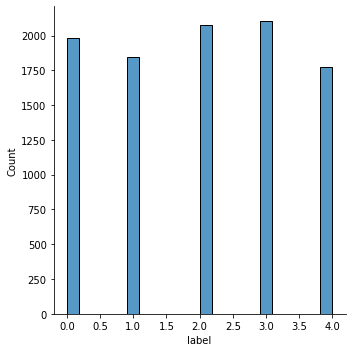

In [15]:
sns.displot(trainLabels, kde=False)

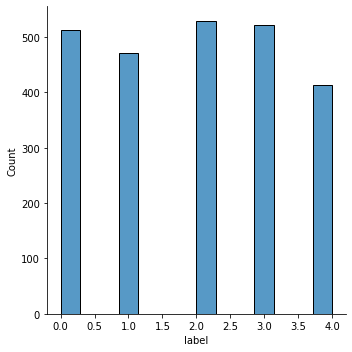

In [16]:
sns.displot(testLabels, kde=False)

In [17]:
print("Train Data Size: ", len(trainData))
print("Test Data Size: ", len(testData))

Train Data Size:  9792
Test Data Size:  2448


## Reduce The Dimensionality With PCA

In [18]:
pca_2 = PCA(n_components = 2)
pca_3 = PCA(n_components = 3)

trainData_principal_2 = pd.DataFrame(pca_2.fit_transform(trainData, trainLabels), columns = ['P1', 'P2'])
trainLabels_principal_2 = pd.DataFrame(trainLabels).sort_index(ignore_index=True)
trainData_principal_2 = pd.concat([trainData_principal_2, trainLabels_principal_2], axis=1)


testData_principal_2 = pd.DataFrame(pca_2.fit_transform(testData, testLabels), columns = ['P1', 'P2'])
testLabels_principal_2 = pd.DataFrame(testLabels).sort_index(ignore_index=True)
testData_principal_2 = pd.concat([testData_principal_2, testLabels_principal_2], axis=1)

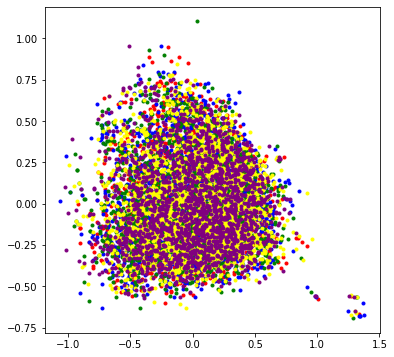

In [19]:
dataClass0 = trainData_principal_2.loc[trainData_principal_2['label']==0]
dataClass1 = trainData_principal_2.loc[trainData_principal_2['label']==1]
dataClass2 = trainData_principal_2.loc[trainData_principal_2['label']==2]
dataClass3 = trainData_principal_2.loc[trainData_principal_2['label']==3]
dataClass4 = trainData_principal_2.loc[trainData_principal_2['label']==4]

plt.figure(figsize = (6, 6)) 

plt.scatter(dataClass0['P1'], dataClass0['P2'], c='red', marker='.')
plt.scatter(dataClass1['P1'], dataClass1['P2'], c='blue', marker='.')
plt.scatter(dataClass2['P1'], dataClass2['P2'], c='green', marker='.')
plt.scatter(dataClass3['P1'], dataClass3['P2'], c='yellow', marker='.')
plt.scatter(dataClass4['P1'], dataClass4['P2'], c='purple', marker='.')

plt.show() 

Dendrogram for TrainData: 



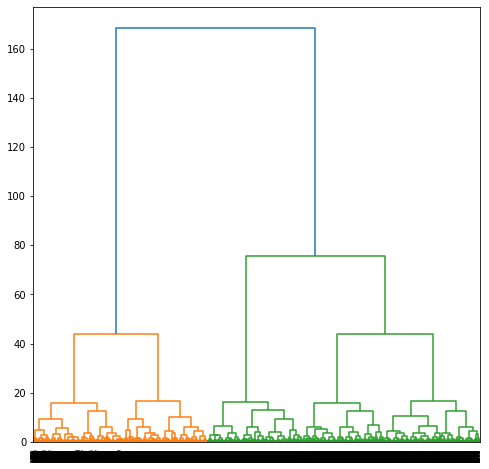

In [20]:
print("Dendrogram for TrainData: \n")
plt.figure(figsize =(8, 8))
trainDendrogram = shc.dendrogram((shc.linkage(trainData_principal_2, method ='ward')))

Dendrogram for TestData: 



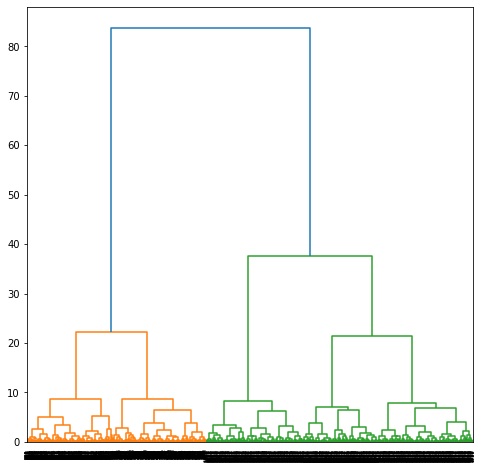

In [21]:
print("Dendrogram for TestData: \n")
plt.figure(figsize =(8, 8))
testDendrogram = shc.dendrogram((shc.linkage(testData_principal_2, method ='ward')))

In [22]:
def print_report(model):
    print("TrainData: ")
    print(classification_report(trainLabels, model.predict(trainData)))
    print()
    print("TestData: ")
    print(classification_report(testLabels, model.predict(testData)))

In [23]:
def visualize_roc_curve(model, data_in, labels_in, n_classes):
    Y_true = label_binarize(labels_in, classes=[int(i) for i in range(n_classes)])
    Y_score = label_binarize(model.predict(data_in), classes=[int(i) for i in range(n_classes)])

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ =  roc_curve(Y_true[:, i], Y_score[:, i])
        roc_auc[i] =  auc(fpr[i], tpr[i])

    plt.figure()

    colors = ['red', 'blue', 'green', 'yellow', 'purple']

    for i in range(n_classes):    
        temp_label = 'ROC of class {0} (area={1:0.2f})'.format(i, roc_auc[i])
        plt.plot(fpr[i], tpr[i], label=temp_label, color=colors[i])

        plt.plot([0, 1], [0, 1], linestyle='--', color='black')
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
    plt.show()

In [24]:
KNN = KNeighborsClassifier(n_neighbors=2, weights='distance', metric='manhattan', algorithm='ball_tree')
KNN.fit(trainData, trainLabels)

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=2,
                     weights='distance')

In [25]:
print("KNN Classifier Train accuracy: ", KNN.score(trainData, trainLabels)*100)
print("KNN Classifier Test accuracy: ", KNN.score(testData, testLabels)*100)

KNN Classifier Train accuracy:  100.0
KNN Classifier Test accuracy:  90.890522875817


In [26]:
print("KNN classification report: \n")
print_report(KNN)

KNN classification report: 

TrainData: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1985
           1       1.00      1.00      1.00      1849
           2       1.00      1.00      1.00      2077
           3       1.00      1.00      1.00      2104
           4       1.00      1.00      1.00      1777

    accuracy                           1.00      9792
   macro avg       1.00      1.00      1.00      9792
weighted avg       1.00      1.00      1.00      9792


TestData: 
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       512
           1       0.91      0.91      0.91       472
           2       0.90      0.91      0.91       529
           3       0.93      0.89      0.91       521
           4       0.87      0.91      0.89       414

    accuracy                           0.91      2448
   macro avg       0.91      0.91      0.91      2448
weighted avg       0.91 

KNN Classifier: ROC curve of train


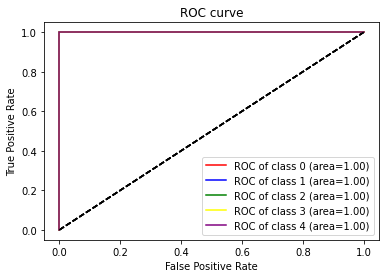

In [27]:
print("KNN Classifier: ROC curve of train")
visualize_roc_curve(KNN, trainData, trainLabels, n_classes=5)

KNN Classifier: ROC curve of test


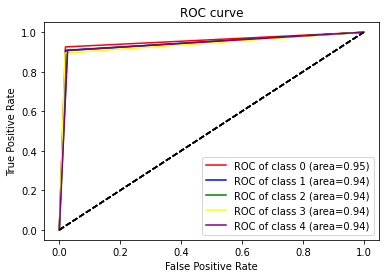

In [28]:
print("KNN Classifier: ROC curve of test")
visualize_roc_curve(KNN, testData, testLabels, n_classes=5)

In [29]:
svm = SVC(kernel='rbf', C=1, gamma=8, decision_function_shape='ovo', random_state=42)
svm.fit(trainData, trainLabels)

SVC(C=1, decision_function_shape='ovo', gamma=8, random_state=42)

In [30]:
print("SVM Classifier Train accuracy: ", svm.score(trainData, trainLabels)*100)
print("SVM Classifier Test accuracy: ", svm.score(testData, testLabels)*100)

SVM Classifier Train accuracy:  99.46895424836602
SVM Classifier Test accuracy:  84.43627450980392


In [31]:
print("SVM classification report: \n")
print_report(svm)

SVM classification report: 

TrainData: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1985
           1       1.00      0.99      1.00      1849
           2       1.00      1.00      1.00      2077
           3       1.00      0.99      0.99      2104
           4       0.99      0.99      0.99      1777

    accuracy                           0.99      9792
   macro avg       0.99      0.99      0.99      9792
weighted avg       0.99      0.99      0.99      9792


TestData: 
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       512
           1       0.94      0.78      0.85       472
           2       0.89      0.86      0.87       529
           3       0.70      0.90      0.79       521
           4       0.86      0.82      0.84       414

    accuracy                           0.84      2448
   macro avg       0.86      0.84      0.85      2448
weighted avg       0.86 

SVM Classifier: ROC curve of train


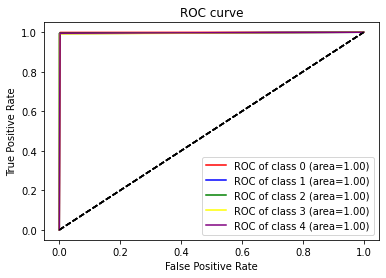

In [32]:
print("SVM Classifier: ROC curve of train")
visualize_roc_curve(svm, trainData, trainLabels, n_classes=5)

SVM Classifier: ROC curve of test


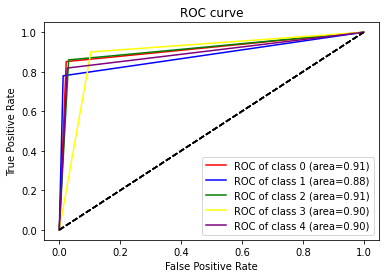

In [33]:
print("SVM Classifier: ROC curve of test")
visualize_roc_curve(svm, testData, testLabels, n_classes=5)

In [34]:
MLP = MLPClassifier(hidden_layer_sizes = (128, 64, 32, 8), batch_size = 32, solver = 'sgd', random_state=4, \
                      verbose=True, momentum=0.85, max_iter=350, learning_rate_init = 0.01)
MLP.fit(trainData, trainLabels)

Iteration 1, loss = 1.61611116
Iteration 2, loss = 1.56312989
Iteration 3, loss = 1.51773943
Iteration 4, loss = 1.49578649
Iteration 5, loss = 1.47703304
Iteration 6, loss = 1.45845122
Iteration 7, loss = 1.44183714
Iteration 8, loss = 1.41972660
Iteration 9, loss = 1.40089003
Iteration 10, loss = 1.37880413
Iteration 11, loss = 1.35899500
Iteration 12, loss = 1.33333385
Iteration 13, loss = 1.30368528
Iteration 14, loss = 1.27535094
Iteration 15, loss = 1.24525540
Iteration 16, loss = 1.21524335
Iteration 17, loss = 1.19424942
Iteration 18, loss = 1.17855291
Iteration 19, loss = 1.14867519
Iteration 20, loss = 1.12742811
Iteration 21, loss = 1.10528033
Iteration 22, loss = 1.09549947
Iteration 23, loss = 1.07661165
Iteration 24, loss = 1.06103262
Iteration 25, loss = 1.03775995
Iteration 26, loss = 1.01176023
Iteration 27, loss = 0.99601560
Iteration 28, loss = 0.98737886
Iteration 29, loss = 0.96669244
Iteration 30, loss = 0.94514228
Iteration 31, loss = 0.92730983
Iteration 32, los

MLPClassifier(batch_size=32, hidden_layer_sizes=(128, 64, 32, 8),
              learning_rate_init=0.01, max_iter=350, momentum=0.85,
              random_state=4, solver='sgd', verbose=True)

In [35]:
print("MLP Classifier Train accuracy: ", MLP.score(trainData, trainLabels)*100)
print("MLP Classifier Test accuracy: ", MLP.score(testData, testLabels)*100)

MLP Classifier Train accuracy:  96.49714052287581
MLP Classifier Test accuracy:  76.79738562091504


In [36]:
print("MLP classification report: \n")
print_report(MLP)

MLP classification report: 

TrainData: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1985
           1       0.98      0.97      0.97      1849
           2       0.98      0.94      0.96      2077
           3       0.97      0.98      0.97      2104
           4       0.93      0.98      0.95      1777

    accuracy                           0.96      9792
   macro avg       0.96      0.97      0.96      9792
weighted avg       0.97      0.96      0.97      9792


TestData: 
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       512
           1       0.81      0.74      0.78       472
           2       0.80      0.73      0.77       529
           3       0.75      0.76      0.76       521
           4       0.69      0.79      0.74       414

    accuracy                           0.77      2448
   macro avg       0.77      0.77      0.77      2448
weighted avg       0.77 

MLP Classifier: ROC curve of train


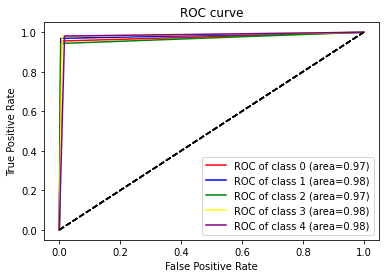

In [37]:
print("MLP Classifier: ROC curve of train")
visualize_roc_curve(MLP, trainData, trainLabels, n_classes=5)

MLP Classifier: ROC curve of test


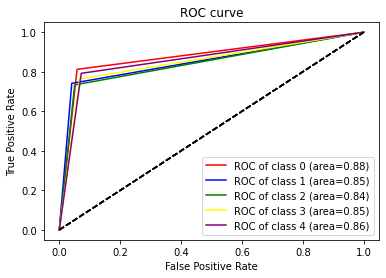

In [38]:
print("MLP Classifier: ROC curve of test")
visualize_roc_curve(MLP, testData, testLabels, n_classes=5)

In [61]:
train_sizes, train_scores, test_scores = learning_curve(KNN, trainData, trainLabels, scoring="accuracy")

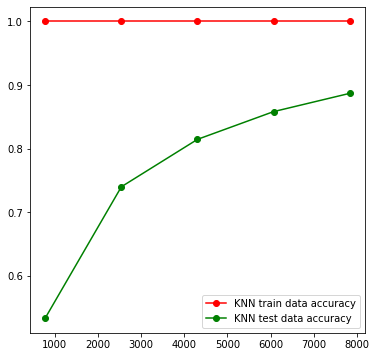

In [62]:
plt.figure(figsize = (6, 6)) 

plt.plot(train_sizes, train_scores.mean(1), "o-", color="r", label="KNN train data accuracy")
plt.plot(train_sizes, test_scores.mean(1), "o-", color="g", label="KNN test data accuracy")

plt.legend(loc="best")
plt.show()

In [63]:
train_sizes, train_scores, test_scores = learning_curve(KNN, trainData, trainLabels, scoring="neg_log_loss")

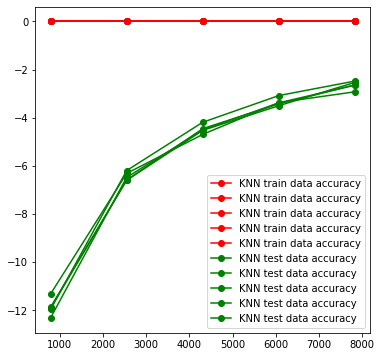

In [66]:
plt.figure(figsize = (6, 6)) 


plt.plot(train_sizes, train_scores, "o-", color="r", label="KNN train data accuracy")
plt.plot(train_sizes, test_scores, "o-", color="g", label="KNN test data accuracy")

plt.legend(loc="best")
plt.show()

In [43]:
# train_loss = log_loss(trainLabels, KNN.predict_proba(trainData), eps=1e-15)
# print(train_loss)

# test_loss = log_loss(testLabels, KNN.predict_proba(testData), eps=1e-15)
# print(test_loss)

In [44]:
def visualize_clustring_result(model, feature1, feature2, data_in, text1, text2):
    print(text1, "\n")
    fig = plt.figure(figsize=(6, 6))
    plt.scatter(feature1, feature2, c=model.fit_predict(data_in), cmap ='rainbow')
    plt.show()
    
    print()
    print(text2, "\n")
    fig = plt.figure(figsize=(6, 6))
    Axes3D(fig).scatter(feature1, feature2, zs=0, c=model.fit_predict(data_in),  cmap ='rainbow')
    plt.show()

In [45]:
kMeans = KMeans(n_clusters=5, init='k-means++',random_state=2, algorithm='elkan', max_iter=100)
kMeans.fit(trainData_principal_2, trainLabels)

KMeans(algorithm='elkan', max_iter=100, n_clusters=5, random_state=2)

In [46]:
print("kMeans train accuracy score: ", accuracy_score(np.array(trainLabels), kMeans.predict(trainData_principal_2))*100)
print("kMeans train silhouette score: ", silhouette_score(trainData_principal_2, kMeans.predict(trainData_principal_2), random_state=2)*100)

kMeans train accuracy score:  20.96609477124183
kMeans train silhouette score:  53.37339224192128


In [47]:
print("kMeans test accuracy score: ", accuracy_score(np.array(testLabels), kMeans.predict(testData_principal_2))*100)
print("kMeans test silhouette score: ", silhouette_score(testData_principal_2, kMeans.predict(testData_principal_2), random_state=2)*100)

kMeans test accuracy score:  22.344771241830067
kMeans test silhouette score:  53.79870257422458


In [48]:
print("MLP classification report: \n")
print(classification_report(trainLabels, kMeans.predict(trainData_principal_2)))

MLP classification report: 

              precision    recall  f1-score   support

           0       0.20      0.22      0.21      1985
           1       0.20      0.20      0.20      1849
           2       0.21      0.20      0.21      2077
           3       0.24      0.23      0.23      2104
           4       0.19      0.19      0.19      1777

    accuracy                           0.21      9792
   macro avg       0.21      0.21      0.21      9792
weighted avg       0.21      0.21      0.21      9792



kMeans Cluster: result of train in 2D 



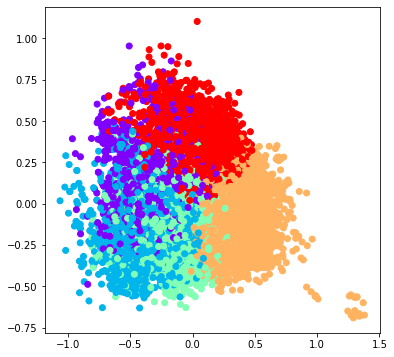


kMeans Cluster: result of train in 3D 



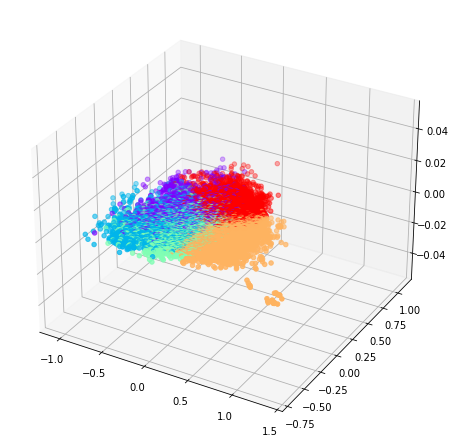

In [49]:
text1 = "kMeans Cluster: result of train in 2D"
text2 = "kMeans Cluster: result of train in 3D"

visualize_clustring_result(kMeans, trainData_principal_2['P1'], trainData_principal_2['P2'], trainData, text1, text2)

kMeans Cluster: result of test in 2D 



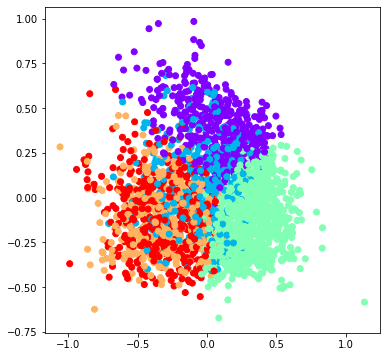


kMeans Cluster: result of test in 3D 



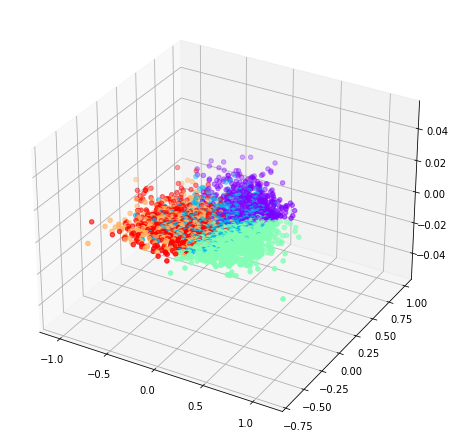

In [50]:
text1 = "kMeans Cluster: result of test in 2D"
text2 = "kMeans Cluster: result of test in 3D"

visualize_clustring_result(kMeans, testData_principal_2['P1'], testData_principal_2['P2'], testData, text1, text2)

In [51]:
dbscan = DBSCAN(eps=0.8, min_samples=3, metric='manhattan', n_jobs=2)
dbscan.fit(trainData_principal_2, trainLabels)

DBSCAN(eps=0.8, metric='manhattan', min_samples=3, n_jobs=2)

In [52]:
print("DBSCAN train accuracy score: ", accuracy_score(np.array(trainLabels), dbscan.fit_predict(trainData_principal_2))*100)
print("DBSCAN train silhouette score: ", silhouette_score(trainData_principal_2, dbscan.fit_predict(trainData_principal_2), random_state=2)*100)

DBSCAN train accuracy score:  20.26143790849673
DBSCAN train silhouette score:  53.37339224192128


In [53]:
print("DBSCAN test accuracy score: ", accuracy_score(np.array(testLabels), dbscan.fit_predict(testData_principal_2))*100)
print("DBSCAN test silhouette score: ", silhouette_score(testData_principal_2, dbscan.fit_predict(testData_principal_2), random_state=2)*100)

DBSCAN test accuracy score:  21.07843137254902
DBSCAN test silhouette score:  53.79870257422458


DBSCAN Cluster: result of train in 2D 



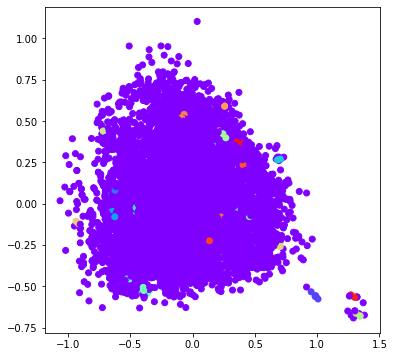


DBSCAN Cluster: result of train in 3D 



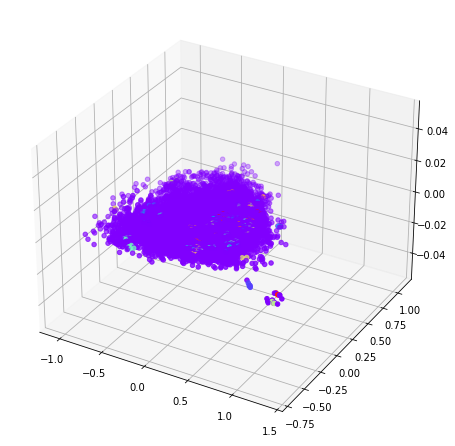

In [54]:
text1 = "DBSCAN Cluster: result of train in 2D"
text2 = "DBSCAN Cluster: result of train in 3D"

visualize_clustring_result(dbscan, trainData_principal_2['P1'], trainData_principal_2['P2'], trainData, text1, text2)

DBSCAN Cluster: result of test in 2D 



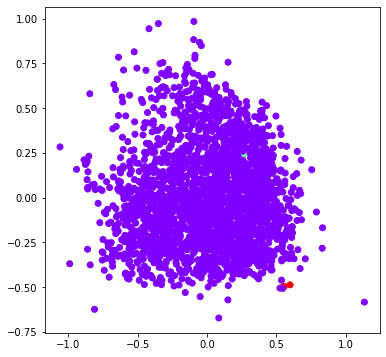


DBSCAN Cluster: result of test in 3D 



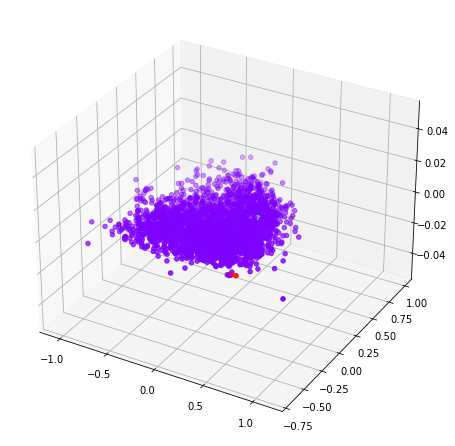

In [55]:
text1 = "DBSCAN Cluster: result of test in 2D"
text2 = "DBSCAN Cluster: result of test in 3D"

visualize_clustring_result(dbscan, testData_principal_2['P1'], testData_principal_2['P2'], testData, text1, text2)

In [56]:
kMedoids = KMedoids(n_clusters=5, init='k-medoids++', random_state=2, method='pam', max_iter=100)
kMedoids.fit(trainData_principal_2, trainLabels)

KMedoids(init='k-medoids++', max_iter=100, method='pam', n_clusters=5,
         random_state=2)

In [57]:
print("kMedoids train accuracy score: ", accuracy_score(np.array(trainLabels), kMedoids.predict(trainData_principal_2))*100)
print("kMedoids train silhouette score: ", silhouette_score(trainData_principal_2, kMedoids.predict(trainData_principal_2), random_state=2)*100)

kMedoids train accuracy score:  19.679330065359476
kMedoids train silhouette score:  53.37339224192128


In [58]:
print("kMedoids test accuracy score: ", accuracy_score(np.array(testLabels), kMedoids.predict(testData_principal_2))*100)
print("kMedoids test silhouette score: ", silhouette_score(testData_principal_2, kMedoids.predict(testData_principal_2), random_state=2)*100)

kMedoids test accuracy score:  19.730392156862745
kMedoids test silhouette score:  53.79870257422458


kMedoids Cluster: result of train in 2D 



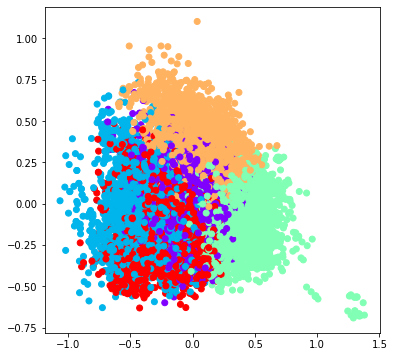


kMedoids Cluster: result of train in 3D 



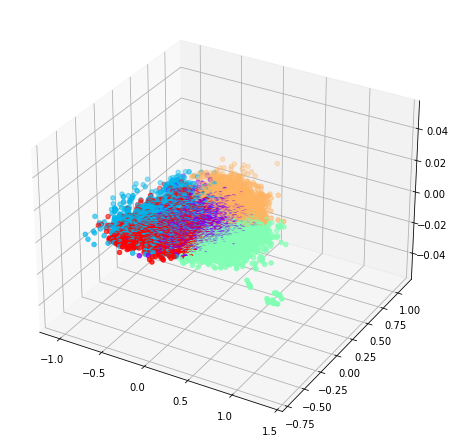

In [59]:
text1 = "kMedoids Cluster: result of train in 2D"
text2 = "kMedoids Cluster: result of train in 3D"

visualize_clustring_result(kMedoids, trainData_principal_2['P1'], trainData_principal_2['P2'], trainData, text1, text2)

kMedoids Cluster: result of test in 2D 



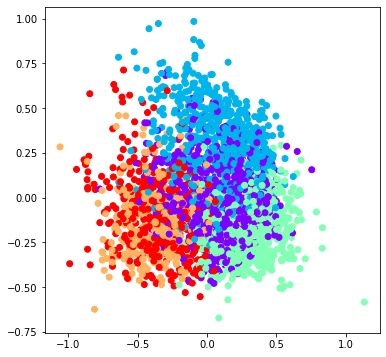


kMedoids Cluster: result of test in 3D 



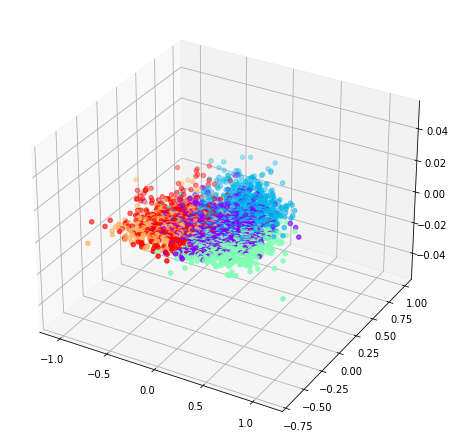

In [60]:
text1 = "kMedoids Cluster: result of test in 2D"
text2 = "kMedoids Cluster: result of test in 3D"

visualize_clustring_result(kMedoids, testData_principal_2['P1'], testData_principal_2['P2'], testData, text1, text2)